# Introduction 

Predict the onset of diabetes based on diagnostic measures. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.In this dataset, the term Diabetes Pedigree Function means it is function which scores likelihood of diabetes based on family history.



# Aim of the Project
- 1) The objective of this project is to be whether someone has diabetes or not.
- 2) Dataset has a several Medical Variables(Independent) and one  target variable or Outcome Variable(Dependent)
- 3) The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
- 4) The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).
- 5) performed various machine learning models for  which model is improving the accuracy score

## Variables of the dataset

**Pregnancies**: Number of times pregnant

**Glucose**: Plasma glucose concentration 2 hours in an oral glucose tolerance test

**Blood Pressure**: Diastolic blood pressure (mm Hg)

**Skin Thickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**Diabetes Pedigree Function**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic

In [27]:
#importing some common libraries like NumPy, pandas, matplotlib, seaborn, nltk and many more.To remove this headache of importing such libraries manually, we have pyforest library
# pip install pyforest
import pyforest


# loading dataset

In [32]:
#reading  a dataset
df=pd.read_csv(r'diabetes.csv', encoding= 'unicode_escape')
print("dataset")
df.head()#display the top 5 data records

dataset


,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [36]:
print('columns from dataset')
df.columns #learning about the columns

columns from dataset


Index([' Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness',
       'Insulin', ' BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome'],
      dtype='object')

In [34]:
print("Rows and columns")
df.shape# # using this, get numer of columns and rows in the dataset

Rows and columns


(768, 9)

In [39]:
print("Datatypes of columns")
df.info()# # Basic information of data

Datatypes of columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0    Pregnancies                768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5    BMI                        768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
df.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features.

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# observation:
- We observe that min value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see insulin levels as high as 846! We have to treat the outliers.

In [41]:
#check for missing values, count them and print the sum for every column
df.isnull().sum()


 Pregnancies                  0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
 BMI                          0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

# observation :-
- There are no null values in this dataset

In [43]:
# checking if there are any duplicate rows
df.duplicated().sum()

0

# observation :-
-   There is no duplicated in the dataset

In [45]:
# to find skewness
df.skew()

 Pregnancies                  0.901674
Glucose                       0.173754
Blood Pressure               -1.843608
Skin Thickness                0.109372
Insulin                       2.272251
 BMI                         -0.428982
Diabetes Pedigree Function    1.919911
Age                           1.129597
Outcome                       0.635017
dtype: float64

# observation :-
- few of the columns have a skewed distribution
- so the mean is more affected by outliers than the median
- Glucose and Blood Pressure have normal distributions hence we have to replace 0 values in those columns by mean value
- SkinThickness, Insulin,BMI have skewed distributions hence median is a better choice as it is less affected by outliers.

In [48]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['Blood Pressure']=df['Blood Pressure'].replace(0,df['Blood Pressure'].mean())#normal distribution
df['Skin Thickness']=df['Skin Thickness'].replace(0,df['Skin Thickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df[' BMI']=df[' BMI'].replace(0,df[' BMI'].median())#skewed distribution


# Data Visualization
## Here we are going to plot :-
- Count Plot :- to see if the dataset is balanced or not
- Histograms :- to see if data is normally distributed or skewed
- Box Plot :- to analyse the distribution and see the outliers
- Scatter plots :- to understand relationship between any two variables
- Pair plot :- to create scatter plot between all the variables

In [89]:
print("0 is no diabetic and 1 is  diabetic")
# Return a Series containing counts of unique values.
df['Outcome'].value_counts()

0 is no diabetic and 1 is  diabetic


0    500
1    268
Name: Outcome, dtype: int64

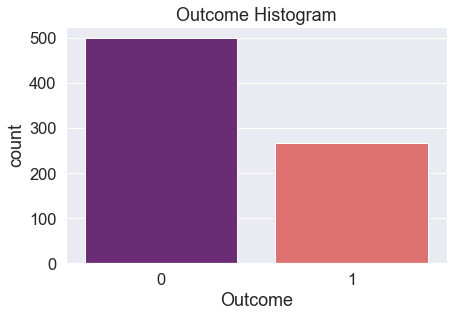

In [87]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df[x],palette=("magma"))
   
    
plt.figure(figsize=(15,20))

plot_count('Outcome', 1)

# observation:- 
- We observe the number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced.

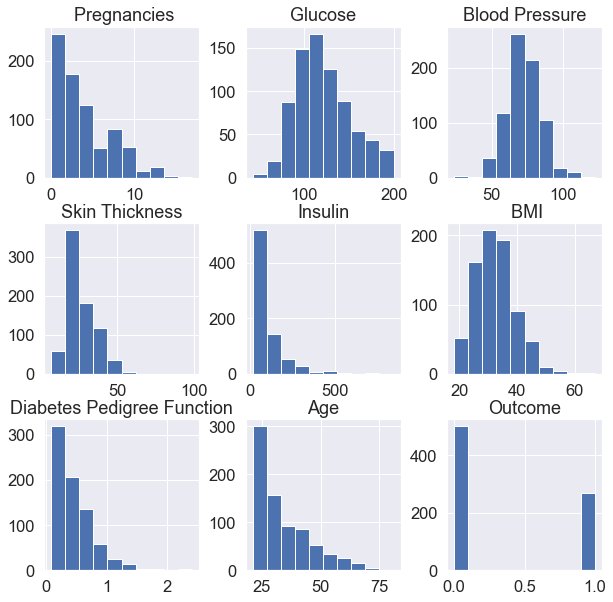

In [91]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))

plt.show()

# observation:- 
- We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

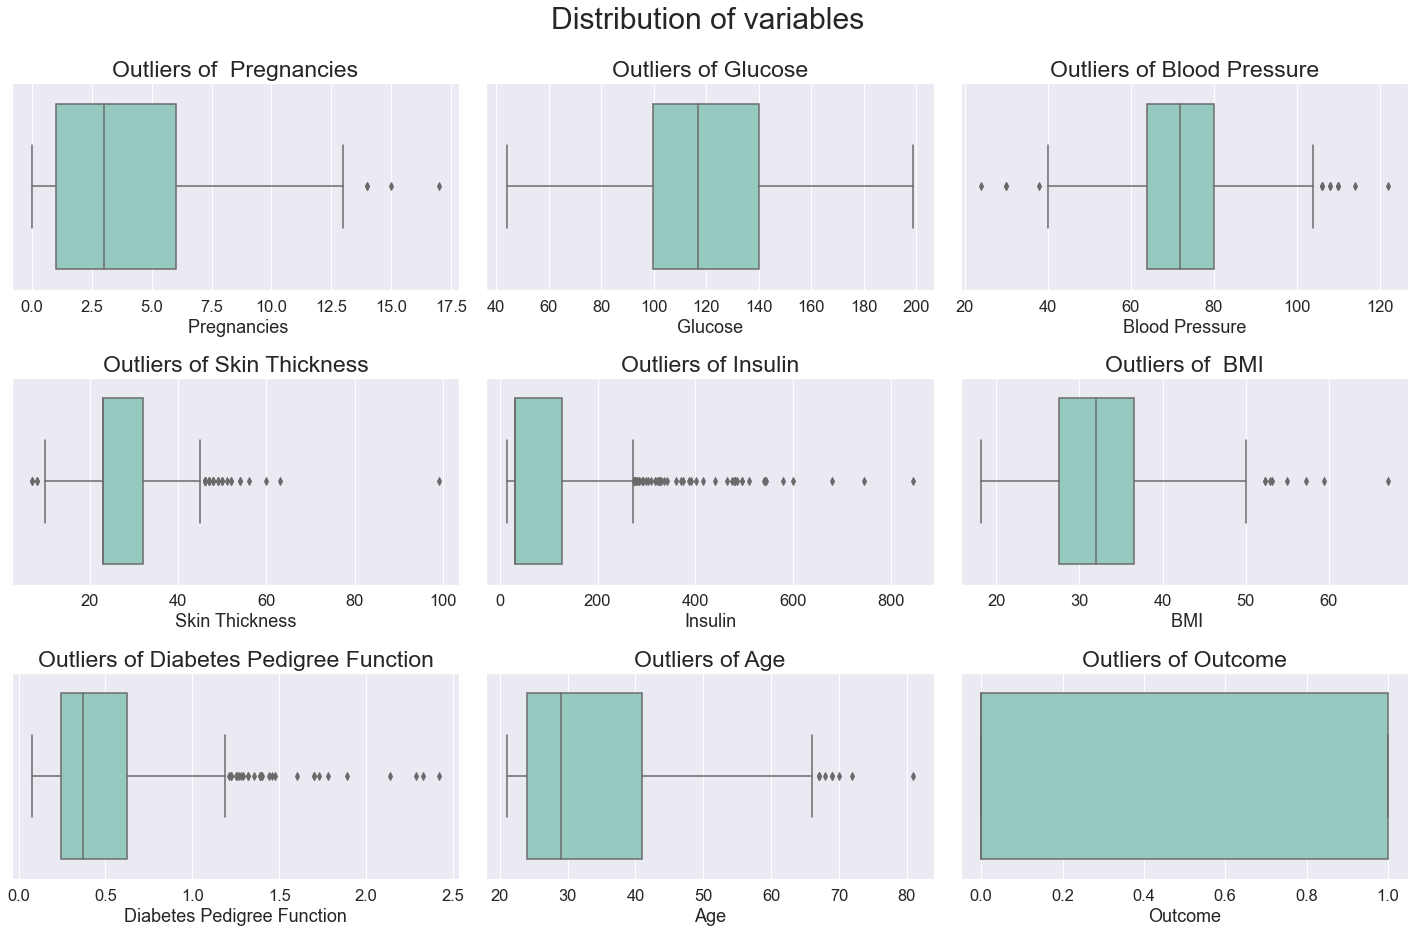

In [103]:
n=1
plt.subplots(figsize=(20, 16))#create common layouts of subplots, including the enclosing figure object, in a single call.
for i in df:
    plt.subplot(4,3,n)#create common layouts of subplots, including the enclosing figure object, in a single call.
    ax = plt.gca()#used to get the current Axes instance on the current figure matching the given keyword args
    sns.set(font_scale = 1.5)#customize seaborn theme or use one of six variations of the default theme
    sns.boxplot(x=df[i], palette='Set3')  #creating a box plot  
    ax.set_title('Outliers of %s'%(i), fontsize=23)# axes module of matplotlib library is used to set a title for the axes
    n+=1 
    plt.tight_layout()# used to automatically adjust subplot parameters to give specified padding
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)#Add a centered suptitle to the figure
plt.show()#its shows the result

# observation:-
- insulin, diabetes pedigree function,bmi is high outliers
- so we have to deal with it using various scaling and transformation techniques.

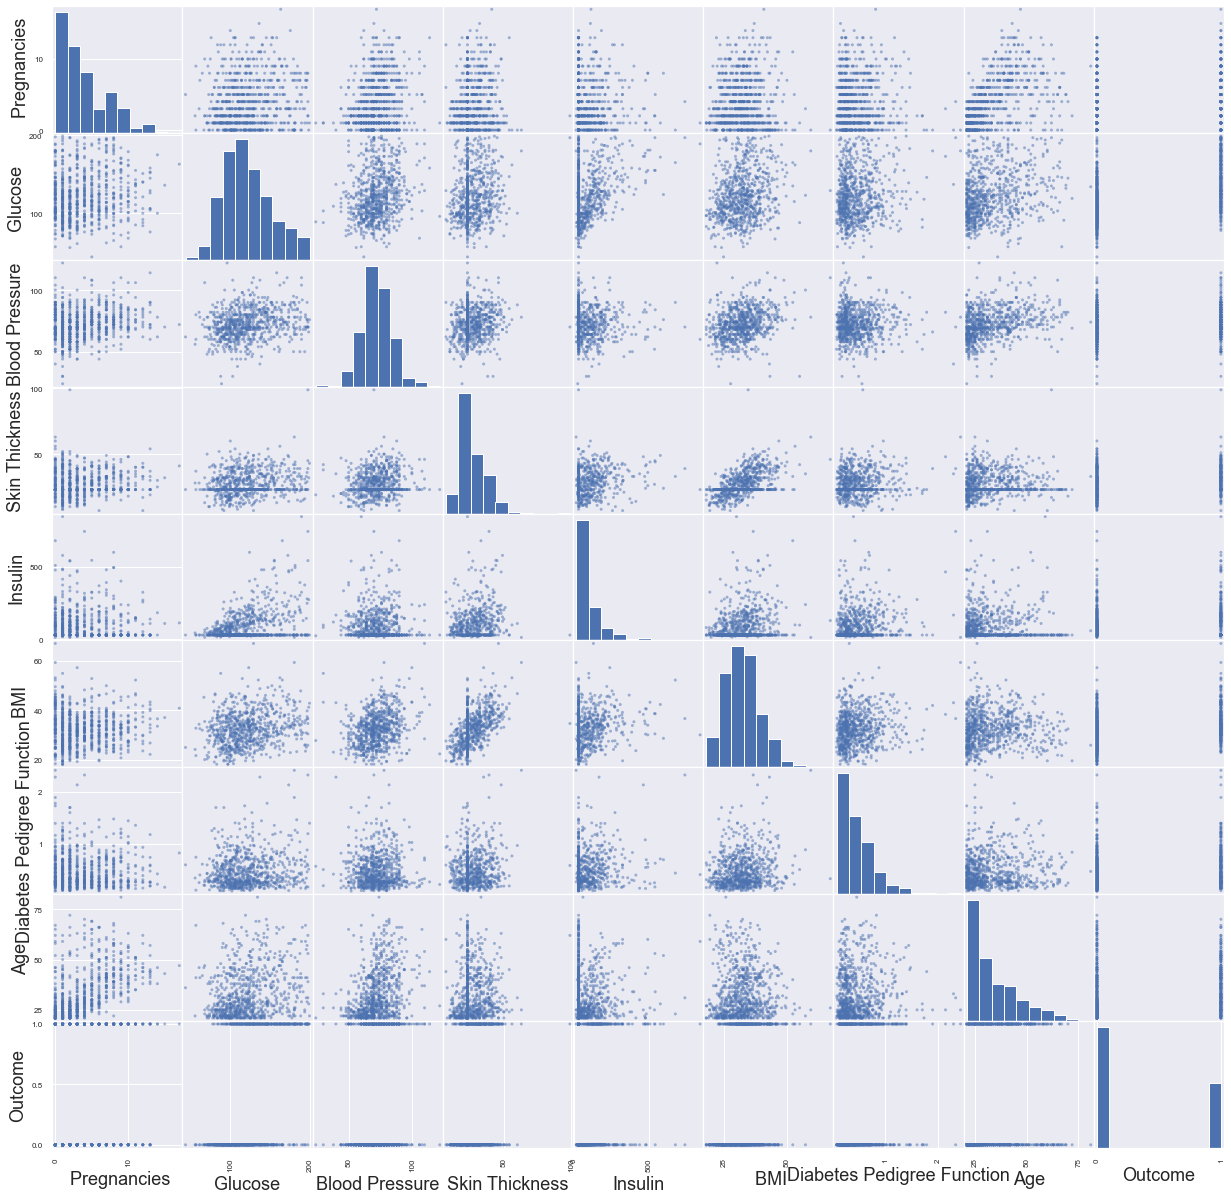

In [105]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(21,21));

# Pearson's Correlation Coefficient :-
-  find out the relationship between two quantities. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

- A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

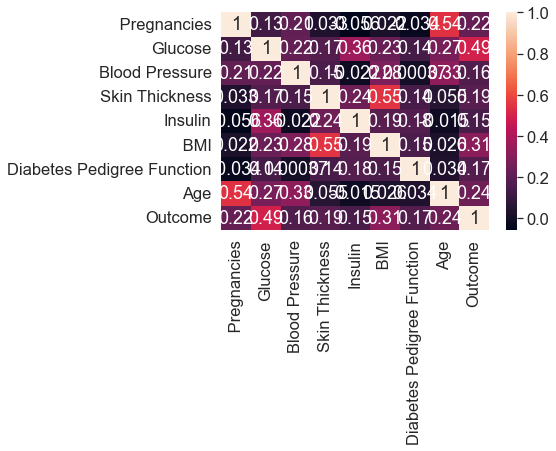

<Figure size 1080x720 with 0 Axes>

In [115]:
#Correlation using heatmap
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)
plt.figure(figsize=(15,10))
plt.show()#its show the result

# observation:- 
- We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated

# Handling the outliers

# 1 ) what is outliers ?
- In simple terms, an outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset you're working with.

# 2) How can we Identify an outlier?
- Using Box plots

- Using Scatter plot

- Using Z score

I've used Box Plots above in data visualization step to detect outliers.

# 3) How am I treating the outliers ?
### Quantile Transformer :-
- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

In [119]:
df_selected=df.drop(['Outcome'],axis='columns')
# droping the outcome column & assigned the df_selected 

In [120]:
df_selected.head(1)

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50


In [123]:
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()#quantiletransformer assigned  the  qt
x=df_selected
X = qt.fit_transform(x)#This method performs fit and transform on the input data at a single time and converts the data points.

In [126]:
df_new=pd.DataFrame(X)#creating a new data frame assigned the df_new

In [137]:

df_new.columns=[' Pregnancies','Glucose','Blood Pressure','Skin Thickness','Insulin',' BMI','Diabetes Pedigree Function','Age']

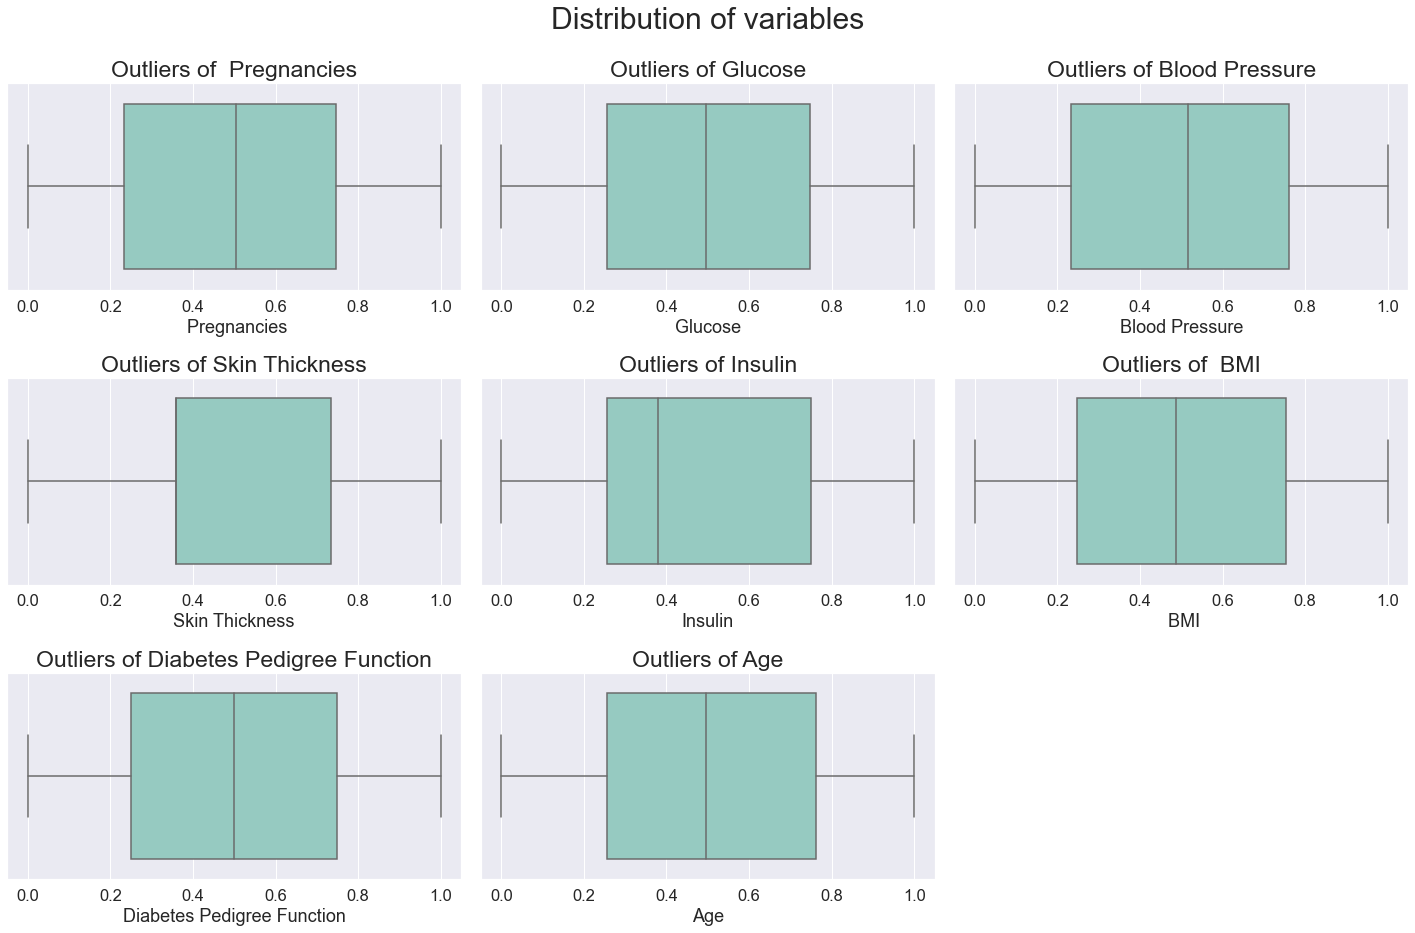

In [138]:
n=1
plt.subplots(figsize=(20, 16))#create common layouts of subplots, including the enclosing figure object, in a single call.
for i in df_new:
    plt.subplot(4,3,n)#create common layouts of subplots, including the enclosing figure object, in a single call.
    ax = plt.gca()#used to get the current Axes instance on the current figure matching the given keyword args
    sns.set(font_scale = 1.5)#customize seaborn theme or use one of six variations of the default theme
    sns.boxplot(x=df_new[i], palette='Set3')  #creating a box plot  
    ax.set_title('Outliers of %s'%(i), fontsize=23)# axes module of matplotlib library is used to set a title for the axes
    n+=1 
    plt.tight_layout()# used to automatically adjust subplot parameters to give specified padding
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)#Add a centered suptitle to the figure
plt.show()#its shows the result

# observation:- 
- handiing the outliers successfully as show the above box plot

# Split the Data Frame into X and y

In [140]:
target_name=df['Outcome'] # contains only dependent features 
y= target_name#given predictions - training data 
x=df_new#dropping the Outcome column and keeping all other columns as X

In [141]:
x.head() # contains only independent features 

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
0,0.747718,0.810300,0.516949,0.801825,0.256193,0.591265,0.750978,0.889831
1,0.232725,0.091265,0.290091,0.644720,0.256193,0.213168,0.475880,0.558670
2,0.863755,0.956975,0.233377,0.357888,0.256193,0.077575,0.782269,0.585398
3,0.232725,0.124511,0.290091,0.357888,0.662973,0.284224,0.106258,0.000000
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258


In [142]:
y.head() #contains dependent feature

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#  Train test split

- The train-test split is a technique for evaluating the performance of a machine learning algorithm.

- Train Dataset: Used to fit the machine learning model.

- Test Dataset: Used to evaluate the fit machine learning model.

- Common split percentages include:

- Train: 80%, Test: 20%

- Train: 67%, Test: 33%

- Train: 50%, Test: 50%

I've used 80% train and 20% test

In [143]:
from sklearn.model_selection import train_test_split
#splitting data in 80% train, 20%test
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [144]:
X_train.shape,y_train.shape# its help the what is the shape of x train & x train

((614, 8), (614,))

In [145]:
X_test.shape,y_test.shape # its help the what is the shape of x test & y test

((154, 8), (154,))

# The models include the following:-
- Linear Regression 
- Logistic Regression
- Decision Tree
- RandomForestClassifier
- Support Vector Classification


- Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score
- Confusion Matrix It is a tabular visualization of the model predictions versus the ground-truth labels.
- F1 Score :- It’s the harmonic mean between precision and recall.
- Precision Score Precision is the fraction of predicted positives/negatives events that are actually positive/negatives.
- Recall Score It is the fraction of positives/negative events that you predicted correctly.
- Reference :- https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

# Linear Regression

- Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables they are considering, and the number of independent variables getting used.

In [184]:
# importing the linear regression 
from sklearn.linear_model import LinearRegression
lr= LinearRegression()# linear regression assinged the lr
lr.fit(X_train,y_train)# we use the required formula and perform the calculation on the feature values of input data and fit this calculation to the transformer.    

LinearRegression()

In [185]:

ye_pred=reg.predict(X_test)


In [188]:
#Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formall
print(" accurancy score -" ,accuracy_score(y_test,ye_pred) * 100)

 accurancy score - 77.92207792207793


In [189]:
print("Classification Report is:\n",classification_report(y_test,ye_pred))# printing the classification rport
print("\n F1:\n",f1_score(y_test,ye_pred))# printing the f1 score
print("\n Precision score is:\n",precision_score(y_test,ye_pred))# printing the precision score
print("\n Recall score is:\n",recall_score(y_test,ye_pred))# printing  the recall score
print("\n Confusion Matrix:\n",confusion_matrix(y_test,ye_pred))# printing the confusion martix

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       107
           1       0.66      0.57      0.61        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154


 F1:
 0.6136363636363638

 Precision score is:
 0.6585365853658537

 Recall score is:
 0.574468085106383

 Confusion Matrix:
 [[93 14]
 [20 27]]


# observation:-
- So we get a accuracy score of 77.92 % using LinearRegression

# Logistic Regression:-

- Logistical regression is selected when the dependent variable is categorical, meaning they have binary outputs, such as "true" and "false" or "yes" and "no."


In [146]:
# import the logistic regression ,confusion martix, recall score, accuracy score, f1 score, accuracy_score,classifiton report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import accuracy_score

In [147]:
reg = LogisticRegression()# logistic regression assigned reg 
reg.fit(X_train,y_train)# we use the required formula and perform the calculation on the feature values of input data and fit this calculation to the transformer.      

LogisticRegression()

In [149]:
y_pred=reg.predict(X_test)

In [152]:
#Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formall
accuracy_score(y_test,y_pred) * 100

77.92207792207793

In [161]:
print("Classification Report is:\n",classification_report(y_test,y_pred))# print the classification report
print("\n F1:\n",f1_score(y_test,y_pred))# printing the f1 score
print("\n Precision score is:\n",precision_score(y_test,y_pred))# printing the precision score
print("\n Recall score is:\n",recall_score(y_test,y_pred))# printiong the recall score
print("\n Confusion Matrix:\n",confusion_matrix(y_test,y_pred))# printing the confusion martix

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       107
           1       0.57      0.66      0.61        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154


 F1:
 0.613861386138614

 Precision score is:
 0.5740740740740741

 Recall score is:
 0.6595744680851063

 Confusion Matrix:
 [[84 23]
 [16 31]]


# observation:-
- So we get a accuracy score of 77.92 % using Logistic Regression

# Decision Tree

- Decision Tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

In [154]:
# import the decision classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()# decision classifier assigned the dt

In [155]:
# we use the required formula and perform the calculation on the feature values of input data and fit this calculation to the transformer.    
dt.fit(X_train,y_train)    

DecisionTreeClassifier()

In [156]:
y_pred=dt.predict(X_test)

In [158]:
#Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formall
accuracy_score(y_test,y_pred)* 100

74.67532467532467

In [160]:
print("Classification Report is:\n",classification_report(y_test,y_pred))# print the classification report
print("\n F1:\n",f1_score(y_test,y_pred))# printing the f1 score
print("\n Precision score is:\n",precision_score(y_test,y_pred))))# printing the precision score
print("\n Recall score is:\n",recall_score(y_test,y_pred))# printiong the recall score
print("\n Confusion Matrix:\n",confusion_matrix(y_test,y_pred))# printing the confusion martix


Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       107
           1       0.57      0.66      0.61        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154


 F1:
 0.613861386138614

 Precision score is:
 0.5740740740740741

 Recall score is:
 0.6595744680851063

 Confusion Matrix:
 [[84 23]
 [16 31]]


# observation:-
- So we get a accuracy score of 74.67 % using Decision Tree

# RandomForestClassifier

- A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.



In [162]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)  # we use the required formula and perform the calculation on the feature values of input data and fit this calculation to the transformer.    

RandomForestClassifier()

In [163]:
yt_pred=rfc.predict(X_test)

In [169]:
#Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formall
print("accuracy score -",accuracy_score(y_test,yt_pred)* 100)

accuracy score - 79.87012987012987


In [166]:
# importing the r2 score and mean squared error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,yt_pred))# print the classification report
print("Confusion Matrix:\n",confusion_matrix(y_test,yt_pred))# printing the confusion martix
print("Training Score:\n",rfc.score(X_train,y_train)*100)# printing the rfc score
print("Mean Squared Error:\n",mean_squared_error(y_test,yt_pred))# printing the mean squared error
print("R2 score is:\n",r2_score(y_test,yt_pred))# printing the r2 score

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.70      0.60      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154

Confusion Matrix:
 [[95 12]
 [19 28]]
Training Score:
 100.0
Mean Squared Error:
 0.2012987012987013
R2 score is:
 0.05070590574666933


# observation:-
- So we get a accuracy score of 79.87 % using RandomForestClassifier

# Support Vector Classification

- The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.

In [175]:
from sklearn.svm import SVC# importing the support vector classification
svc = SVC()# svc assigned the svc
svc.fit(X_train,y_train)  # we use the required formula and perform the calculation on the feature values of input data and fit this calculation to the transformer.    

SVC()

In [178]:
ym_pred=svc.predict(X_test)

In [179]:
#Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formall
print("accuracy score -", accuracy_score(y_test,ym_pred)* 100)

accuracy score - 78.57142857142857


In [181]:
print("Classification Report is:\n",classification_report(y_test,ym_pred))# print the classification report
print("Confusion Matrix:\n",confusion_matrix(y_test,ym_pred))# printing the confusion martix
print("Training Score:\n",svc.score(X_train,y_train)*100) # prining the svs score
print("Mean Squared Error:\n",mean_squared_error(y_test,ym_pred))# printing the mean squared error
print("R2 score is:\n",r2_score(y_test,ym_pred))# printing the r2 score

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       107
           1       0.68      0.55      0.61        47

    accuracy                           0.79       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix:
 [[95 12]
 [21 26]]
Training Score:
 80.13029315960912
Mean Squared Error:
 0.21428571428571427
R2 score is:
 -0.01053887452773905


# observation:-
- So we get a accuracy score of 78.57 % using Support Vector Classification

# Conclusion 

 ## Aim of the Project
- 1) The objective of this project is to be whether someone has diabetes or not.
- 2) Dataset has a several Medical Variables(Independent) and one  target variable or Outcome Variable(Dependent)
- 3) The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
- 4) The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).
- 5) performed various machine learning models for  which model is improving the accuracy score
## How to manage a project step by step implementation of models
- Analysis the dataset perfomed the Exploratory Data Analysis and checking the skew columns performed the mean  ,median its depending upon the skewness
- There are outliers in columns finding the columns by using  box plot & performed the  outliers  by using the QuantileTransformer machine learning technique 
- The train-test split is a technique for evaluating the performance of a machine learning algorithm. spliting the data into  20% test and 80% train 
-  performed models are used in Linear Regression,Logistic Regression,Decision Tree,RandomForestClassifier,Support Vector Classification
-   performed models for improving the  accuracy score 
- Achieved accuracy score of 79.87 % after training  the model ,RandomForestClassifier is model


